<a id = 'top'></a>
# Stars Final Project: IFMR
#### Mairead Heiger, Helena Richie, and Meghan Cilento


## Cummings et al. Data

- [`Data`](#data)


## MIST

- [`MIST Models`](#mistmodels)
- [`Initial vs. Final Mass MIST plots`](#allMISTplots)
- [`MIST IFMR fits with Theil-Sen method`](#theilsen)
    - [Best fit to all models](#TSoverall)
    - [Best fit by metallicity range](#TSrange)
    - [Best fit for each metallicity](#TSall)
- [`Theil-Sen and Least Squares comparison`](#comparison)


## Observational Data

- [`Data Fitting with Theil-Sen method`](#datafitting)

In [1]:
%pylab inline
from astropy.io import ascii
import read_mist_models
import os
from astropy.table import Table
from scipy.interpolate import interp1d
from scipy.interpolate import splev, splrep
from scipy import stats
from scipy.stats import mstats
from matplotlib.colors import LinearSegmentedColormap

# This makes a colormap that isn't too pale at the low end
interval = np.hstack([np.linspace(0.2, 0.5), np.linspace(0.5, 1)])
colors = plt.cm.YlGnBu(interval)
cmap = LinearSegmentedColormap.from_list('name', colors)

# Customize all plots in this notebook using rcParams
pylab.rcParams.update({'font.size': 14})
pylab.rcParams.update({'font.family': 'sans-serif'})
pylab.rcParams.update({'mathtext.default':'regular'})
pylab.rcParams.update({'mathtext.fontset':'stixsans'})
pylab.rcParams.update({'axes.linewidth': 1.5})
pylab.rcParams.update({'axes.labelsize': 15})
pylab.rcParams.update({'xtick.direction':'in'})
pylab.rcParams.update({'xtick.major.size': 5})
pylab.rcParams.update({'xtick.major.width': 1.25 })
pylab.rcParams.update({'xtick.minor.size': 2.5})
pylab.rcParams.update({'xtick.minor.width': 1.25 })
pylab.rcParams.update({'xtick.labelsize': 10 })
pylab.rcParams.update({'ytick.direction':'in'})
pylab.rcParams.update({'ytick.major.size': 5})
pylab.rcParams.update({'ytick.major.width': 1.25 })
pylab.rcParams.update({'ytick.minor.size': 2.5})
pylab.rcParams.update({'ytick.minor.width': 1.25 })
pylab.rcParams.update({'ytick.labelsize': 10 })

Populating the interactive namespace from numpy and matplotlib


<a id = 'data'></a>

## Cummings et. al data
<font size = '2'>*<a href = '#top' style="text-decoration:none"> Return to top ↑ </a>*</font>

In [2]:
# Read In Data

cummings_masses = ascii.read("cummings_mass_readable.txt", data_start = 2)
cummings_mets = ascii.read("cummings_clusters.txt", delimiter = '\t', data_start = 2, guess = False)

In [3]:
# Parse Cummings Data

cummings_masses
obsMf, obsMferr = cummings_masses['M_f'], cummings_masses['M_ferr']
obsMi, obsMi_top, obsMi_bot = cummings_masses['MIST_M_i'], cummings_masses['mmi_low'], cummings_masses['mmi_high']

wd_z000 = cummings_masses[[i for i, v in enumerate(cummings_masses['ID']) if 'NGC2516' in v or 'NGC1039' in v or 'NGC3532' in v or 'NGC2099' in v]]
wd_p001 = cummings_masses[[i for i, v in enumerate(cummings_masses['ID']) if 'leiades' in v]]
wd_m0143 = cummings_masses[[i for i, v in enumerate(cummings_masses['ID']) if 'NGC2168' in v]]
wd_m011 = cummings_masses[[i for i, v in enumerate(cummings_masses['ID']) if 'NGC2287' in v]]
wd_p015 = cummings_masses[[i for i, v in enumerate(cummings_masses['ID']) if 'yad' in v or 'rae' in v]]
wd_m020 = cummings_masses[[i for i, v in enumerate(cummings_masses['ID']) if 'NGC7789' in v]]
wd_m004 = cummings_masses[[i for i, v in enumerate(cummings_masses['ID']) if 'NGC6819' in v]]
wd_m110 = cummings_masses[[i for i, v in enumerate(cummings_masses['ID']) if 'NGC6121' in v]]

<a id = 'mistmodels'></a>

## MIST Models
<font size = '2'>*<a href = '#top' style="text-decoration:none"> Return to top ↑ </a>*</font>

In [4]:
# Define Initial & Final MIST Masses and Introduce Data Cuts

data = ascii.read("IFM_all_11.10.txt")

mets = ['[Fe/H] = +0.50',
'[Fe/H] = +0.25',
'[Fe/H] = 0.00',
'[Fe/H] = -0.25',
'[Fe/H] = -0.50',
'[Fe/H] = -0.75',
'[Fe/H] = -1.00',
'[Fe/H] = -1.25',
'[Fe/H] = -1.50',
'[Fe/H] = -1.75',
'[Fe/H] = -2.00',
'[Fe/H] = -2.50',
'[Fe/H] = -3.00',
'[Fe/H] = -3.50',
'[Fe/H] = -4.00']

mi_p050, mf_p050 = data["mi_p050"], data["mf_p050"]
mi_p025, mf_p025 = data["mi_p025"], data["mf_p025"]
mi_z000, mf_z000 = data["mi_z000"], data["mf_z000"]
mi_m025, mf_m025 = data["mi_m025"], data["mf_m025"]
mi_m050, mf_m050 = data["mi_m050"], data["mf_m050"]
mi_m075, mf_m075 = data["mi_m075"], data["mf_m075"]
mi_m100, mf_m100 = data["mi_m100"], data["mf_m100"]
mi_m125, mf_m125 = data["mi_m125"], data["mf_m125"]
mi_m150, mf_m150 = data["mi_m150"], data["mf_m150"]
mi_m175, mf_m175 = data["mi_m175"], data["mf_m175"]
mi_m200, mf_m200 = data["mi_m200"], data["mf_m200"]
mi_m250, mf_m250 = data["mi_m250"], data["mf_m250"]
mi_m300, mf_m300 = data["mi_m300"], data["mf_m300"]
mi_m350, mf_m350 = data["mi_m350"], data["mf_m350"]
mi_m400, mf_m400 = data["mi_m400"], data["mf_m400"]

cuts_p050 = np.where(data["mi_p050"] != 0.0)[0]
cuts_p025 = np.where(data["mi_p025"] != 0.0)[0]
cuts_z000 = np.where(data["mi_z000"] != 0.0)[0]
cuts_m025 = np.where(data["mi_m025"] != 0.0)[0]
cuts_m050 = np.where(data["mi_m050"] != 0.0)[0]
cuts_m075 = np.where(data["mi_m075"] != 0.0)[0]
cuts_m100 = np.where(data["mi_m100"] != 0.0)[0]
cuts_m125 = np.where(data["mi_m125"] != 0.0)[0]
cuts_m150 = np.where(data["mi_m150"] != 0.0)[0]
cuts_m175 = np.where(data["mi_m175"] != 0.0)[0]
cuts_m200 = np.where(data["mi_m200"] != 0.0)[0]
cuts_m250 = np.where(data["mi_m250"] != 0.0)[0]
cuts_m300 = np.where(data["mi_m300"] != 0.0)[0]
cuts_m350 = np.where(data["mi_m350"] != 0.0)[0]
cuts_m400 = np.where(data["mi_m400"] != 0.0)[0]



mi_p050, mf_p050 = mi_p050[cuts_p050], mf_p050[cuts_p050]
mi_p025, mf_p025 = mi_p025[cuts_p025], mf_p025[cuts_p025]
mi_z000, mf_z000 = mi_z000[cuts_z000], mf_z000[cuts_z000]
mi_m025, mf_m025 = mi_m025[cuts_m025], mf_m025[cuts_m025]
mi_m050, mf_m050 = mi_m050[cuts_m050], mf_m050[cuts_m050]
mi_m075, mf_m075 = mi_m075[cuts_m075], mf_m075[cuts_m075]
mi_m100, mf_m100 = mi_m100[cuts_m100], mf_m100[cuts_m100]
mi_m125, mf_m125 = mi_m125[cuts_m125], mf_m125[cuts_m125]
mi_m150, mf_m150 = mi_m150[cuts_m150], mf_m150[cuts_m150]
mi_m175, mf_m175 = mi_m175[cuts_m175], mf_m175[cuts_m175]
mi_m200, mf_m200 = mi_m200[cuts_m200], mf_m200[cuts_m200]
mi_m250, mf_m250 = mi_m250[cuts_m250], mf_m250[cuts_m250]
mi_m300, mf_m300 = mi_m300[cuts_m300], mf_m300[cuts_m300]
mi_m350, mf_m350 = mi_m350[cuts_m350], mf_m350[cuts_m350]
mi_m400, mf_m400 = mi_m400[cuts_m400], mf_m400[cuts_m400]



all_mis = [mi_p050[cuts_p050], mi_p025[cuts_p025], mi_z000[cuts_z000], mi_m025[cuts_m025], 
           mi_m050[cuts_m050], mi_m075[cuts_m075], mi_m100[cuts_m100], mi_m125[cuts_m125], 
           mi_m150[cuts_m150], mi_m175[cuts_m175], mi_m200[cuts_m200], mi_m250[cuts_m250], 
           mi_m300[cuts_m300], mi_m350[cuts_m350], mi_m400[cuts_m400]]
all_mfs = [mf_p050[cuts_p050], mf_p025[cuts_p025], mf_z000[cuts_z000], mf_m025[cuts_m025], 
           mf_m050[cuts_m050], mf_m075[cuts_m075], mf_m100[cuts_m100], mf_m125[cuts_m125], 
           mf_m150[cuts_m150], mf_m175[cuts_m175], mf_m200[cuts_m200], mf_m250[cuts_m250], 
           mf_m300[cuts_m300], mf_m350[cuts_m350], mf_m400[cuts_m400]]

metnums = np.array([0.50, 0.25, 0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.50, 3.00, 3.50, 4.00])

<a id = 'allMISTplots'></a>


## Initial vs. Final Mass for MIST Models
<font size = '2'>*<a href = '#top' style="text-decoration:none"> Return to top ↑ </a>*</font>

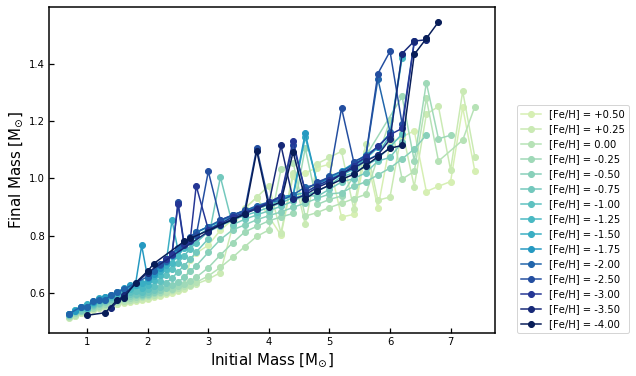

In [5]:
# Plot Initial vs. Final Mass for MIST Models

plt.figure(figsize = (8,6))

plt.plot(mi_p050, mf_p050, '-o', color = cmap(1.*0/len(mets)), label = mets[0])
plt.plot(mi_p025, mf_p025, '-o', color = cmap(1.*1/len(mets)), label = mets[1]) 
plt.plot(mi_z000, mf_z000, '-o', color = cmap(1.*2/len(mets)), label = mets[2]) 
plt.plot(mi_m025, mf_m025, '-o', color = cmap(1.*3/len(mets)), label = mets[3]) 
plt.plot(mi_m050, mf_m050, '-o', color = cmap(1.*4/len(mets)), label = mets[4]) 
plt.plot(mi_m075, mf_m075, '-o', color = cmap(1.*5/len(mets)), label = mets[5]) 
plt.plot(mi_m100, mf_m100, '-o', color = cmap(1.*6/len(mets)), label = mets[6]) 
plt.plot(mi_m125, mf_m125, '-o', color = cmap(1.*7/len(mets)), label = mets[7]) 
plt.plot(mi_m150, mf_m150, '-o', color = cmap(1.*8/len(mets)), label = mets[8]) 
plt.plot(mi_m175, mf_m175, '-o', color = cmap(1.*9/len(mets)), label = mets[9]) 
plt.plot(mi_m200, mf_m200, '-o', color = cmap(1.*11/len(mets)), label = mets[10]) 
plt.plot(mi_m250, mf_m250, '-o', color = cmap(1.*12/len(mets)), label = mets[11]) 
plt.plot(mi_m300, mf_m300, '-o', color = cmap(1.*13/len(mets)), label = mets[12]) 
plt.plot(mi_m350, mf_m350, '-o', color = cmap(1.*14/len(mets)), label = mets[13]) 
plt.plot(mi_m400, mf_m400, '-o', color = cmap(1.*15/len(mets)), label = mets[14]) 

plt.xlabel(r"Initial Mass [$M_{\odot}$]")
plt.ylabel(r"Final Mass [$M_{\odot}$]")

leg = plt.legend(loc = (1.05, 0.0))

plt.show()

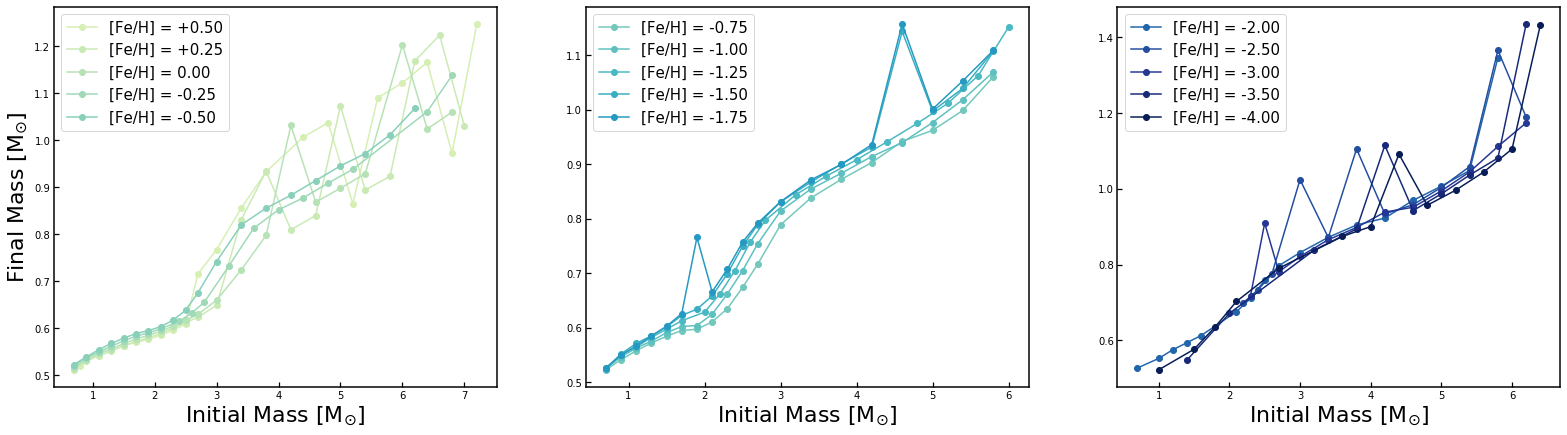

In [6]:
# Plot 3-panel Figure of MIST IFMR

fig = plt.figure(figsize = (27, 7))

ax1 = plt.subplot(1, 3, 1)

ax1.plot(mi_p050[0:-1:2], mf_p050[0:-1:2], '-o', color = cmap(1.*0/len(mets)), label = mets[0])
ax1.plot(mi_p025[0:-1:2], mf_p025[0:-1:2], '-o', color = cmap(1.*1/len(mets)), label = mets[1])
ax1.plot(mi_z000[0:-1:2], mf_z000[0:-1:2], '-o', color = cmap(1.*2/len(mets)), label = mets[2])
ax1.plot(mi_m025[0:-1:2], mf_m025[0:-1:2], '-o', color = cmap(1.*3/len(mets)), label = mets[3])
ax1.plot(mi_m050[0:-1:2], mf_m050[0:-1:2], '-o', color = cmap(1.*4/len(mets)), label = mets[4])

plt.legend(fontsize = 15)

ax1.set_xlabel(r"Initial Mass [$M_{\odot}$]", fontsize = 22)
ax1.set_ylabel(r"Final Mass [$M_{\odot}$]", fontsize = 22)

ax2 = plt.subplot(1, 3, 2)

ax2.plot(mi_m075[0:-1:2], mf_m075[0:-1:2], '-o', color = cmap(1.*5/len(mets)), label = mets[5])
ax2.plot(mi_m100[0:-1:2], mf_m100[0:-1:2], '-o', color = cmap(1.*6/len(mets)), label = mets[6])
ax2.plot(mi_m125[0:-1:2], mf_m125[0:-1:2], '-o', color = cmap(1.*7/len(mets)), label = mets[7])
ax2.plot(mi_m150[0:-1:2], mf_m150[0:-1:2], '-o', color = cmap(1.*8/len(mets)), label = mets[8])
ax2.plot(mi_m175[0:-1:2], mf_m175[0:-1:2], '-o', color = cmap(1.*9/len(mets)), label = mets[9])

plt.legend(fontsize = 15)

ax2.set_xlabel("Initial Mass [$M_{\odot}$]", fontsize = 22)
         
         
ax3 = plt.subplot(1, 3, 3)
         
ax3.plot(mi_m200[0:-1:2], mf_m200[0:-1:2], '-o', color = cmap(1.*11/len(mets)), label = mets[10]) 
ax3.plot(mi_m250[0:-1:2], mf_m250[0:-1:2], '-o', color = cmap(1.*12/len(mets)), label = mets[11]) 
ax3.plot(mi_m300[0:-1:2], mf_m300[0:-1:2], '-o', color = cmap(1.*13/len(mets)), label = mets[12]) 
ax3.plot(mi_m350[0:-1:2], mf_m350[0:-1:2], '-o', color = cmap(1.*14/len(mets)), label = mets[13]) 
ax3.plot(mi_m400[0:-1:2], mf_m400[0:-1:2], '-o', color = cmap(1.*15/len(mets)), label = mets[14]) 

plt.legend(fontsize = 15)

ax3.set_xlabel("Initial Mass [$M_{\odot}$]", fontsize = 22)      

#plt.savefig("IFM_3panel_11.10.png")

plt.show()

<a id = 'theilsen'></a>

## IFMR fits using Theil-Sen method

<a id = 'TSoverall'></a>
#### Overall best fit

<font size = '2'>*<a href = '#top' style="text-decoration:none"> Return to top ↑ </a>*</font>

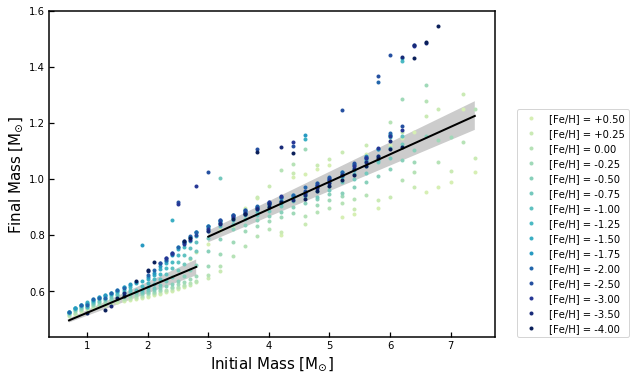

In [7]:
"""
Calculate best fits for all MIST models.

Plot the best fit and upper/lower limits with the MIST models.

"""

# Stack all the different metallicity models so that they can be fit together

all_mi = np.hstack((mi_p050, mi_p025, mi_z000, mi_m025, mi_m050, mi_m075, mi_m100, mi_m125, 
                    mi_m150, mi_m175, mi_m200, mi_m250, mi_m300, mi_m350, mi_m400))

all_mf = np.hstack((mf_p050, mf_p025, mf_z000, mf_m025, mf_m050, mf_m075, mf_m100, mf_m125, 
                    mf_m150, mf_m175, mf_m200, mf_m250, mf_m300, mf_m350, mf_m400))

# Sort the data
i = np.argsort(all_mi)

x = all_mi[i]
y = all_mf[i]

# Define the cut between 'low mass' and 'high mass' 
low = np.where(x < 2.85)[0]
hih = np.where(x >= 2.85)[0]

# Fit the low mass models
al, bl, lo_al, high_al = mstats.theilslopes(y[low], x[low], alpha=0.95)
overall_fit_low = al*x[low] + bl
overall_fit_lowlim_low = lo_al*x[low] + bl
overall_fit_uplim_low = high_al*x[low] + bl

# Fit the high mass models
ah, bh, lo_ah, high_ah = mstats.theilslopes(y[hih], x[hih], alpha=0.95)
overall_fit_hih = ah*x[hih] + bh             # high mass fit
overall_fit_lowlim_hih = lo_ah*x[hih] + bh   # lower limit high mass fit
overall_fit_uplim_hih = high_ah*x[hih] + bh  # upper limit high mass fit

# Round fit parameters for later use
overall_slope_low, overall_inter_low, overall_lowlim_low, overall_uplim_low = round(al, 4), round(bl, 4), round(lo_al, 4), round(high_al, 4)
overall_slope_hih, overall_inter_hih, overall_lowlim_hih, overall_uplim_hih = round(ah, 4), round(bh, 4), round(lo_ah, 4), round(high_ah, 4)

# Plot models and fits
plt.figure(figsize = (8, 6))
        
plt.plot(mi_p050, mf_p050, '.', color = cmap(1.*0/len(mets)), label = mets[0])
plt.plot(mi_p025, mf_p025, '.', color = cmap(1.*1/len(mets)), label = mets[1]) 
plt.plot(mi_z000, mf_z000, '.', color = cmap(1.*2/len(mets)), label = mets[2]) 
plt.plot(mi_m025, mf_m025, '.', color = cmap(1.*3/len(mets)), label = mets[3]) 
plt.plot(mi_m050, mf_m050, '.', color = cmap(1.*4/len(mets)), label = mets[4]) 
plt.plot(mi_m075, mf_m075, '.', color = cmap(1.*5/len(mets)), label = mets[5]) 
plt.plot(mi_m100, mf_m100, '.', color = cmap(1.*6/len(mets)), label = mets[6]) 
plt.plot(mi_m125, mf_m125, '.', color = cmap(1.*7/len(mets)), label = mets[7]) 
plt.plot(mi_m150, mf_m150, '.', color = cmap(1.*8/len(mets)), label = mets[8]) 
plt.plot(mi_m175, mf_m175, '.', color = cmap(1.*9/len(mets)), label = mets[9]) 
plt.plot(mi_m200, mf_m200, '.', color = cmap(1.*11/len(mets)), label = mets[10]) 
plt.plot(mi_m250, mf_m250, '.', color = cmap(1.*12/len(mets)), label = mets[11]) 
plt.plot(mi_m300, mf_m300, '.', color = cmap(1.*13/len(mets)), label = mets[12]) 
plt.plot(mi_m350, mf_m350, '.', color = cmap(1.*14/len(mets)), label = mets[13]) 
plt.plot(mi_m400, mf_m400, '.', color = cmap(1.*15/len(mets)), label = mets[14]) 

# Plot lower mass fits (shade between upper and lower limit fits)
plt.plot(x[low], overall_fit_low, '-', color = 'k', linewidth = 2, label = '')
plt.fill_between(x[low], overall_fit_lowlim_low, overall_fit_uplim_low, facecolor = 'k', alpha = 0.2, capstyle = 'projecting')

# Plot higher mass fits (shade between upper and lower limit fits)
plt.plot(x[hih], overall_fit_hih, '-', color = 'k', linewidth = 2, label = '')
plt.fill_between(x[hih], overall_fit_uplim_hih, overall_fit_lowlim_hih, facecolor = 'k', alpha = 0.2, capstyle = 'projecting')

plt.legend(loc = [1.05, 0])

plt.xlabel(r"Initial Mass [$M_{\odot}$]")
plt.ylabel(r"Final Mass [$M_{\odot}$]")

#plt.savefig('MIST_overall_fits.png', bbox_inches='tight')

plt.show()

<a id = 'TSrange'></a>
#### Best fit by metallicity range

<font size = '2'>*<a href = '#top' style="text-decoration:none"> Return to top ↑ </a>*</font>

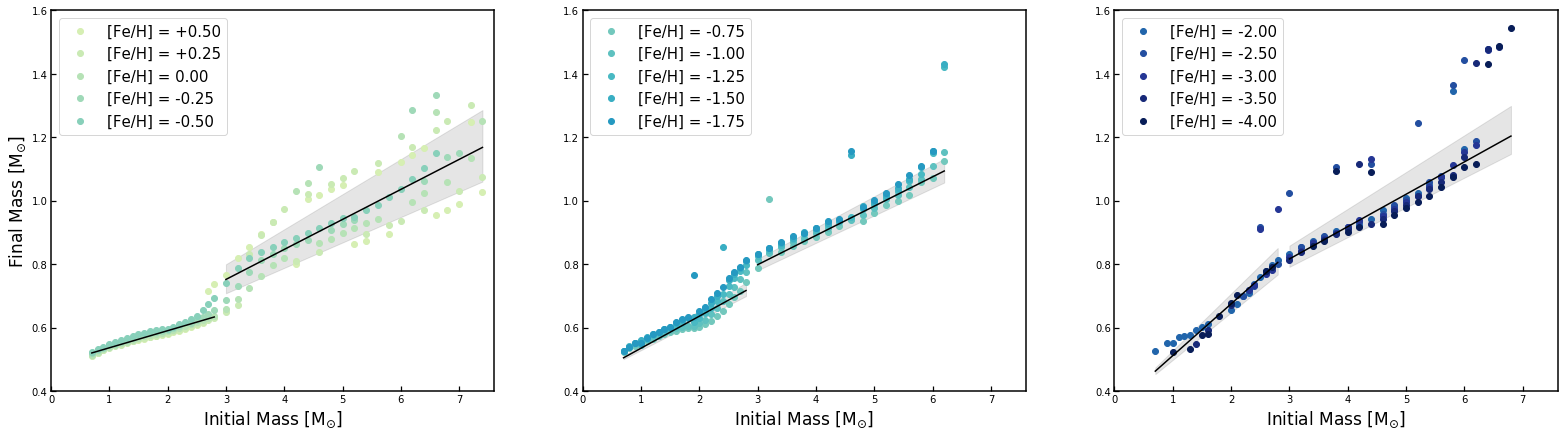

In [8]:
"""
Calculate best fits for each range of metallicities.

high: [Fe/H] = +0.50 to [Fe/H] = -0.50
mid:  [Fe/H] = -0.75 to [Fe/H] = -1.75
low:  [Fe/H] = -2.00 to [Fe/H] = -4.00

Plot each fit with the MIST models.

"""

al_metFits, allow_metFits, alupl_metFits = np.zeros(3), np.zeros(3), np.zeros(3)
bl_metFits = np.zeros(3)

ah_metFits, ahlow_metFits, ahupl_metFits = np.zeros(3), np.zeros(3), np.zeros(3)
bh_metFits = np.zeros(3)

# Higher metallicities
hih_mi = np.hstack((mi_p050, mi_p025, mi_z000, mi_m025, mi_m050))
hih_mf = np.hstack((mf_p050, mf_p025, mf_z000, mf_m025, mf_m050))
h = np.argsort(hih_mi)

x_hih = hih_mi[h]
y_hih = hih_mf[h]

lowh = np.where(x_hih < 2.85)[0]
hihh = np.where(x_hih >= 2.85)[0]

# Theil-Sen fit for low mass; high metallicity
al, bl, lo_al, high_al = mstats.theilslopes(y_hih[lowh], x_hih[lowh], alpha=0.95) # Theil-Sen fit
al_metFits[0], bl_metFits[0], allow_metFits[0], alupl_metFits[0] = round(al, 3), round(bl, 3), round(lo_al, 3), round(high_al, 3)

fl_hih = al*x_hih[lowh] + bl                    # low mass, high metallicity best fit
low_error_low_hih = lo_al*x_hih[lowh] + bl      # low mass, high metallicity lower limit fit
low_error_high_hih = high_al*x_hih[lowh] + bl   # low mass, high metallicity upper limit fit 

# Theil-Sen fit for high mass; high metallicity
ah, bh, lo_ah, high_ah = mstats.theilslopes(y_hih[hihh], x_hih[hihh], alpha=0.95)  # Theil-Sen fit
ah_metFits[0], bh_metFits[0], ahlow_metFits[0], ahupl_metFits[0] = round(ah, 3), round(bh, 3), round(lo_ah, 3), round(high_ah, 3)

fh_hih = ah*x_hih[hihh] + bh                    # high mass, high metallicity best fit
high_error_low_hih = lo_ah*x_hih[hihh] + bh     # high mass, high metallicity lower limit fit
high_error_high_hih = high_ah*x_hih[hihh] + bh  # high mass, high metallicity upper limit fit



# Mid metallicites
mid_mi = np.hstack((mi_m075, mi_m100, mi_m125, mi_m150, mi_m175))
mid_mf = np.hstack((mf_m075, mf_m100, mf_m125, mf_m150, mf_m175))
m = np.argsort(mid_mi)

x_mid = mid_mi[m]
y_mid = mid_mf[m]

lowm = np.where(x_mid < 2.85)[0]
hihm = np.where(x_mid >= 2.85)[0]

# Theil-Sen fit for low mass; mid-range metallicity
al, bl, lo_al, high_al = mstats.theilslopes(y_mid[lowm], x_mid[lowm], alpha=0.95) # Theil-Sen fit
al_metFits[1], bl_metFits[1], allow_metFits[1], alupl_metFits[1] = round(al, 3), round(bl, 3), round(lo_al, 3), round(high_al, 3)

fl_mid = al*x_mid[lowm] + bl                   # low mass, mid metallicity best fit
low_error_low_mid = lo_al*x_mid[lowm] + bl     # low mass, mid metallicity lower limit fit
low_error_high_mid = high_al*x_mid[lowm] + bl  # low mass, mid metallicity upper limit fit 

# Theil-Sen fit for high mass; mid-range metallicity
ah, bh, lo_ah, high_ah = mstats.theilslopes(y_mid[hihm], x_mid[hihm], alpha=0.95)
ah_metFits[1], bh_metFits[1], ahlow_metFits[1], ahupl_metFits[1] = round(ah, 3), round(bh, 3), round(lo_ah, 3), round(high_ah, 3)

fh_mid = ah*x_mid[hihm] + bh                    # high mass, mid metallicity best fit  
high_error_low_mid = lo_ah*x_mid[hihm] + bh     # high mass, mid metallicity lower limit fit
high_error_high_mid = high_ah*x_mid[hihm] + bh  # high mass, mid metallicity upper limit fit 



# Low metallicities
low_mi = np.hstack((mi_m200, mi_m250, mi_m300, mi_m350, mi_m400))
low_mf = np.hstack((mf_m200, mf_m250, mf_m300, mf_m350, mf_m400))
l = np.argsort(low_mi)

x_low = low_mi[l]
y_low = low_mf[l]

lowl = np.where(x_low < 2.85)[0]
hihl = np.where(x_low >= 2.85)[0]

# Theil-Sen fit for low mass; low metallicity
al, bl, lo_al, high_al = mstats.theilslopes(y_low[lowl], x_low[lowl], alpha=0.95) # Theil-Sen fit
al_metFits[2], bl_metFits[2], allow_metFits[2], alupl_metFits[2] = round(al, 3), round(bl, 3), round(lo_al, 3), round(high_al, 3)

fl_low = al*x_low[lowl] + bl                   # low mass, low metallicity best fit 
low_error_low_low = lo_al*x_low[lowl] + bl     # low mass, low metallicity lower limit fit
low_error_high_low = high_al*x_low[lowl] + bl  # low mass, low metallicity upper limit fit 

# Theil-Sen fit for high mass; low metallicity
ah, bh, lo_ah, high_ah = mstats.theilslopes(y_low[hihl], x_low[hihl], alpha=0.95) # Theil-Sen fit
ah_metFits[2], bh_metFits[2], ahlow_metFits[2], ahupl_metFits[2] = round(ah, 3), round(bh, 3), round(lo_ah, 3), round(high_ah, 3)

fh_low = ah*x_low[hihl] + bh                     # high mass, low metallicity best fit
high_error_low_low = lo_ah*x_low[hihl] + bh      # high mass, low metallicity lower limit fit 
high_error_high_low = high_ah*x_low[hihl] + bh   # high mass, low metallicity upper limit fit 


# Plots
plt.figure(figsize = (27,7))

# High met
ax1 = plt.subplot(1, 3, 1)
ax1.set_ylabel(r"Final Mass [$M_{\odot}$]", fontsize = 17)

plt.plot(mi_p050, mf_p050, 'o', color = cmap(1.*0/len(mets)), label = mets[0])
plt.plot(mi_p025, mf_p025, 'o', color = cmap(1.*1/len(mets)), label = mets[1]) 
plt.plot(mi_z000, mf_z000, 'o', color = cmap(1.*2/len(mets)), label = mets[2]) 
plt.plot(mi_m025, mf_m025, 'o', color = cmap(1.*3/len(mets)), label = mets[3]) 
plt.plot(mi_m050, mf_m050, 'o', color = cmap(1.*4/len(mets)), label = mets[4]) 

ax1.plot(x_hih[lowh], fl_hih, 'k')
ax1.plot(x_hih[hihh], fh_hih, 'k')
ax1.fill_between(x_hih[lowh], low_error_low_hih, low_error_high_hih, color = 'k', alpha = 0.1, label = '')
ax1.fill_between(x_hih[hihh], high_error_low_hih, high_error_high_hih, color = 'k', alpha = 0.1, label = '')
plt.ylim(0.4, 1.6)
plt.xlim(0, 7.6)

plt.legend(loc = 'upper left', fontsize = 15)

plt.xlabel(r"Initial Mass [$M_{\odot}$]", fontsize = 17)
   
# Mid met
ax2 = plt.subplot(1, 3, 2)

plt.plot(mi_m075, mf_m075, 'o', color = cmap(1.*5/len(mets)), label = mets[5]) 
plt.plot(mi_m100, mf_m100, 'o', color = cmap(1.*6/len(mets)), label = mets[6]) 
plt.plot(mi_m125, mf_m125, 'o', color = cmap(1.*7/len(mets)), label = mets[7]) 
plt.plot(mi_m150, mf_m150, 'o', color = cmap(1.*8/len(mets)), label = mets[8]) 
plt.plot(mi_m175, mf_m175, 'o', color = cmap(1.*9/len(mets)), label = mets[9])

ax2.plot(x_mid[lowm], fl_mid, 'k')
ax2.plot(x_mid[hihm], fh_mid, 'k')
ax2.fill_between(x_mid[lowm], low_error_low_mid, low_error_high_mid, color = 'k', alpha = 0.1, label = '')
ax2.fill_between(x_mid[hihm], high_error_low_mid, high_error_high_mid, color = 'k', alpha = 0.1, label = '')  
plt.ylim(0.4, 1.6)
plt.xlim(0, 7.6)

plt.legend(loc = 'upper left', fontsize = 15)

plt.xlabel(r"Initial Mass [$M_{\odot}$]", fontsize = 17)

# Low met
ax3 = plt.subplot(1, 3, 3)

ax3.plot(mi_m200, mf_m200, 'o', color = cmap(1.*11/len(mets)), label = mets[10]) 
ax3.plot(mi_m250, mf_m250, 'o', color = cmap(1.*12/len(mets)), label = mets[11]) 
ax3.plot(mi_m300, mf_m300, 'o', color = cmap(1.*13/len(mets)), label = mets[12]) 
ax3.plot(mi_m350, mf_m350, 'o', color = cmap(1.*14/len(mets)), label = mets[13]) 
ax3.plot(mi_m400, mf_m400, 'o', color = cmap(1.*15/len(mets)), label = mets[14]) 


ax3.plot(x_low[lowl], fl_low, 'k')
ax3.plot(x_low[hihl], fh_low, 'k')
ax3.fill_between(x_low[lowl], low_error_low_low, low_error_high_low, color = 'k', alpha = 0.1, label = '')
ax3.fill_between(x_low[hihl], high_error_low_low, high_error_high_low, color = 'k', alpha = 0.1, label = '')
        
leg = plt.legend(loc = 'upper left', fontsize = 15)

plt.xlabel(r"Initial Mass [$M_{\odot}$]", fontsize = 17)

plt.ylim(0.4, 1.6)
plt.xlim(0, 7.6)

#plt.savefig('MIST_TS_fitting.png')

plt.show()

In [9]:
"""
Write the parameters for high, mid, low, and overall fits

"""


cols_metFits = [['High', 'Mid', 'Low'], al_metFits, allow_metFits, alupl_metFits, bl_metFits, ah_metFits, ahlow_metFits, ahupl_metFits, bh_metFits]

metFits_params = Table(cols_metFits, names = ('Metallicity range', 'Slope (low mass)', 'Slope lower limit (low mass)', 
                                              'Slope upper limit (low mass)', 'Intercept (low mass)', 'Slope (high mass)', 'Slope lower limit (high mass)', 
                                              'Slope upper limit (high mass)', 'Intercept (high mass)'))
metFits_params.add_row(['Overall', overall_slope_low, overall_inter_low, overall_lowlim_low, overall_uplim_low, 
                       overall_slope_hih, overall_inter_hih, overall_lowlim_hih, overall_uplim_hih])

metFits_params

Metallicity range,Slope (low mass),Slope lower limit (low mass),Slope upper limit (low mass),Intercept (low mass),Slope (high mass),Slope lower limit (high mass),Slope upper limit (high mass),Intercept (high mass)
str4,float64,float64,float64,float64,float64,float64,float64,float64
High,0.054,0.051,0.057,0.482,0.095,0.08,0.111,0.468
Mid,0.101,0.095,0.11,0.434,0.092,0.086,0.099,0.521
Low,0.163,0.15,0.18,0.348,0.102,0.094,0.116,0.51
Over,0.0907,0.4321,0.08,0.1003,0.0978,0.5008,0.0911,0.1049


<a id = 'TSall'></a>
#### Best fit for each metallicity

<font size = '2'>*<a href = '#top' style="text-decoration:none"> Return to top ↑ </a>*</font>

In [10]:
"""
Compute the best-fit for each individual metallicity and write the parameters to a table.

"""

# Theil-Sen fits saved to table

slopeL_TS = np.zeros(len(all_mis))
interL_TS = np.zeros(len(all_mis))
slopeL_low_TS = np.zeros(len(all_mis))
slopeL_hig_TS = np.zeros(len(all_mis))

slopeH_TS = np.zeros(len(all_mis))
interH_TS = np.zeros(len(all_mis))
slopeH_low_TS = np.zeros(len(all_mis))
slopeH_hig_TS = np.zeros(len(all_mis))


for mi_out, mf_out, index in zip(all_mis, all_mfs, range(len(all_mis))):
    #print(mets[index])
    x = mi_out
    y = mf_out
    
    low = np.where(x < 2.85)[0]
    hih = np.where(x >= 2.85)[0]
    
    al, bl, lo_al, high_al = mstats.theilslopes(y[low], x[low], alpha=0.95)
    ah, bh, lo_ah, high_ah = mstats.theilslopes(y[hih], x[hih], alpha=0.95)
    
    
    slopeL_TS[index] = round(al, 3)
    interL_TS[index] = round(bl, 3)
    slopeL_low_TS[index] = round(lo_al, 3)
    slopeL_hig_TS[index] = round(high_al, 3)
    
    slopeH_TS[index] = round(ah, 3)
    interH_TS[index] = round(bh, 3)
    slopeH_low_TS[index] = round(lo_ah, 3)
    slopeH_hig_TS[index] = round(high_ah, 3)


cols_TS = [mets, slopeL_TS, slopeL_low_TS, slopeL_hig_TS, interL_TS, slopeH_TS, slopeH_low_TS, slopeH_hig_TS, interH_TS]
TS_params = Table(cols_TS, names = ('mets', 'Slope low mass', 'Slope low mass lower bound', 'Slope low mass upper bound', 'B low mass', 
                                                 'Slope high mass', 'Slope high mass lower bound', 'Slope high mass upper bound', 'B high mass'))

TS_params

mets,Slope low mass,Slope low mass lower bound,Slope low mass upper bound,B low mass,Slope high mass,Slope high mass lower bound,Slope high mass upper bound,B high mass
str14,float64,float64,float64,float64,float64,float64,float64,float64
[Fe/H] = +0.50,0.048,0.044,0.055,0.486,0.075,0.046,0.096,0.583
[Fe/H] = +0.25,0.052,0.05,0.054,0.482,0.098,0.079,0.121,0.466
[Fe/H] = 0.00,0.053,0.051,0.055,0.486,0.104,0.09,0.127,0.41
[Fe/H] = -0.25,0.057,0.053,0.06,0.486,0.109,0.095,0.147,0.407
[Fe/H] = -0.50,0.062,0.056,0.069,0.483,0.089,0.079,0.102,0.505
[Fe/H] = -0.75,0.073,0.064,0.091,0.468,0.086,0.08,0.096,0.547
[Fe/H] = -1.00,0.09,0.074,0.113,0.446,0.09,0.083,0.103,0.526
[Fe/H] = -1.25,0.108,0.088,0.131,0.43,0.091,0.084,0.106,0.532
[Fe/H] = -1.50,0.11,0.093,0.137,0.433,0.092,0.084,0.117,0.56


/Users/MCilento/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


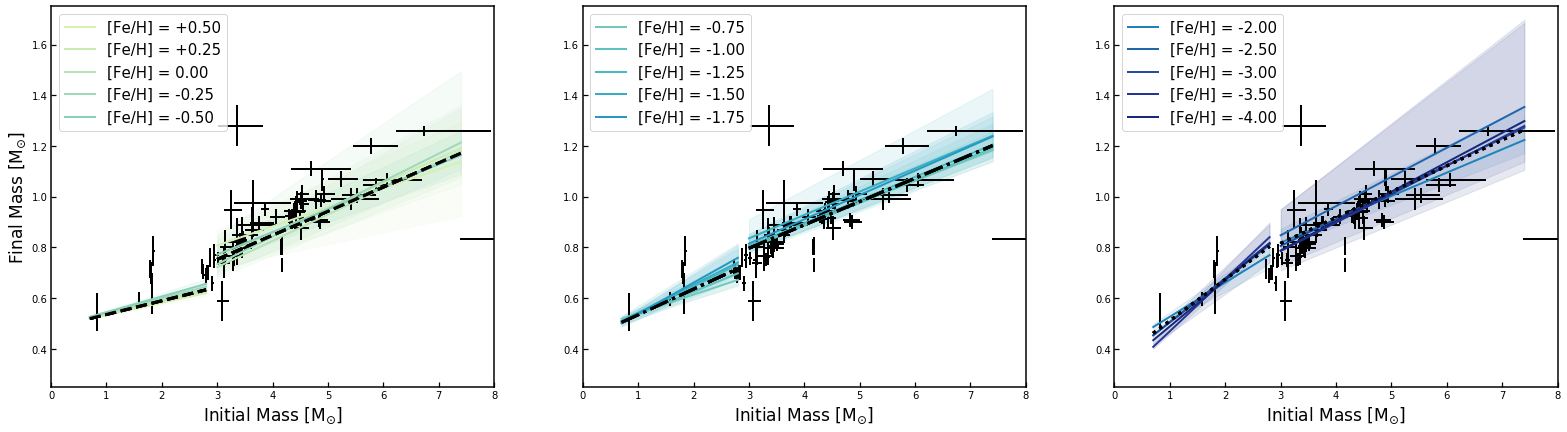

In [11]:
"""
Plot the best-fit for each individual metallicity over observational data.

"""

labels = TS_params['mets']

i = np.argsort(all_mi)

x = all_mi[i]

low = np.where(x < 2.85)[0]
hih = np.where(x >= 2.85)[0]

x_l = x[low]
x_high = x[hih]

plt.figure(figsize = (27,7))

for index in range(len(all_mis)):
    
    if index <= 4:                      # high metallicity
        ax1 = plt.subplot(1, 3, 1)
        ax1.set_ylabel(r"Final Mass [$M_{\odot}$]", fontsize = 17)
        fl = metFits_params['Slope (low mass)'][0] *x_l + metFits_params['Intercept (low mass)'][0]      # best-fits for high metallicity range
        fh = metFits_params['Slope (high mass)'][0]*x_high + metFits_params['Intercept (high mass)'][0]  
        style = '--'
        
    elif (index >= 5) & (index <= 9):   # mid metallicity
        ax1 = plt.subplot(1, 3, 2)
        fl = metFits_params['Slope (low mass)'][1] *x_l + metFits_params['Intercept (low mass)'][1]      # best-fits for mid metallicity range
        fh = metFits_params['Slope (high mass)'][1]*x_high + metFits_params['Intercept (high mass)'][1]  
        style = '-.'
        
    else:                               # low metallicity
        ax1 = plt.subplot(1, 3, 3)
        fl = metFits_params['Slope (low mass)'][2] *x_l + metFits_params['Intercept (low mass)'][2]      # best-fits for low metallicity range
        fh = metFits_params['Slope (high mass)'][2]*x_high + metFits_params['Intercept (high mass)'][2]
        style = ':'

    color = cmap(1.*index/len(mets))
    y_low = TS_params['Slope low mass'][index]*x_l + TS_params['B low mass'][index]        # best fit for each metallicity
    y_high = TS_params['Slope high mass'][index]*x_high + TS_params['B high mass'][index]
        
    if (labels[index] == '[Fe/H] = -2.50') or (labels[index] == '[Fe/H] = -3.00'):
        # these have wild upper/lower slope limits, so we don't plot them (they are tabulated)
        plt.plot(x_l, y_low, '-', color = color, linewidth = 2, label = labels[index])
        plt.plot(x_high, y_high, '-', color = color, linewidth = 2, label = '')
        
    else:
        low_error_low = TS_params['Slope low mass lower bound'][index]*x_l + TS_params['B low mass'][index]
        low_error_high = TS_params['Slope low mass upper bound'][index]*x_l + TS_params['B low mass'][index]
        
        high_error_low = TS_params['Slope high mass lower bound'][index]*x_high + TS_params['B high mass'][index]
        high_error_high = TS_params['Slope high mass upper bound'][index]*x_high + TS_params['B high mass'][index]
        
        ax1.plot(x_l, y_low, '-', color = color, linewidth = 2, label = labels[index])
        ax1.fill_between(x_l, low_error_low, low_error_high, color = color, alpha = 0.1)
        
        ax1.plot(x_high, y_high, '-', color = color, linewidth = 2, label = '')
        ax1.fill_between(x_high, high_error_low, high_error_high, color = color, alpha = 0.1)

    
    # plot best-fit lines for high and low masses for the appropriate metallicity range
    ax1.plot(x_l, fl, 'k', linestyle = style, linewidth = 3)
    ax1.plot(x_high, fh, 'k', linestyle = style, linewidth = 3)

    # plot observational data from Cummings et. al
    plt.errorbar(obsMi, obsMf, xerr = [obsMi_top, obsMi_bot], yerr = obsMferr, color = 'k', ls = 'None', label = '')
    
    plt.legend(loc = 'upper left', fontsize = 15)
    plt.xlabel(r"Initial Mass [$M_{\odot}$]", fontsize = 17)
    plt.ylim(0.25, 1.75)
    plt.xlim(0, 8)


plt.show()

<a id = 'comparison'></a>
## Least Squares - Theil-Sen comparison

<font size = '2'>*<a href = '#top' style="text-decoration:none"> Return to top ↑ </a>*</font>

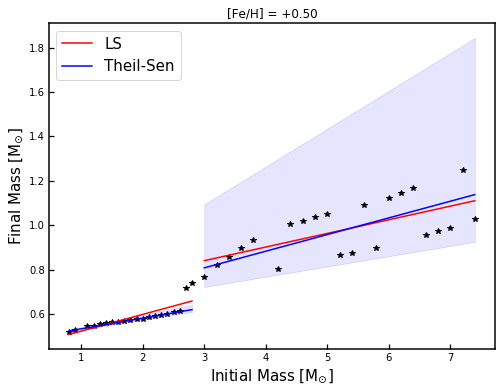

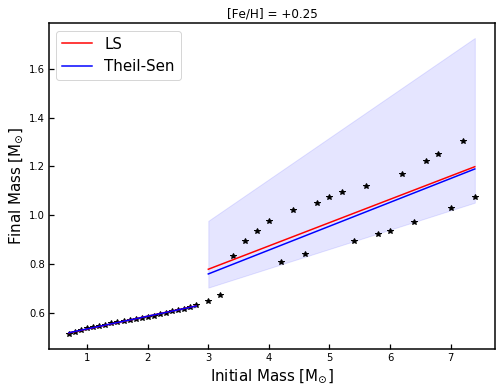

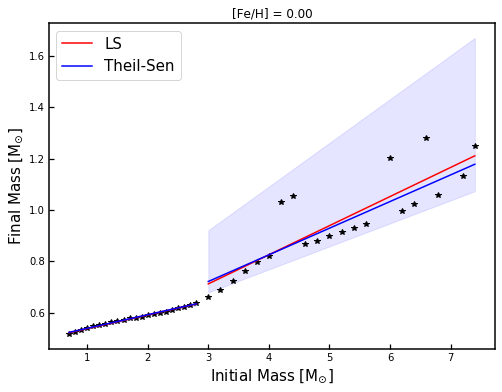

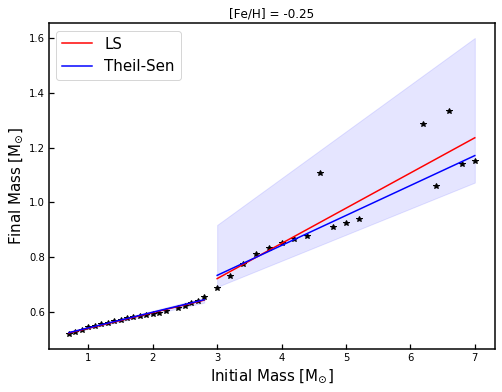

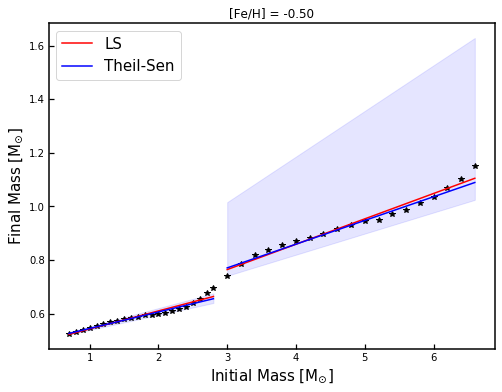

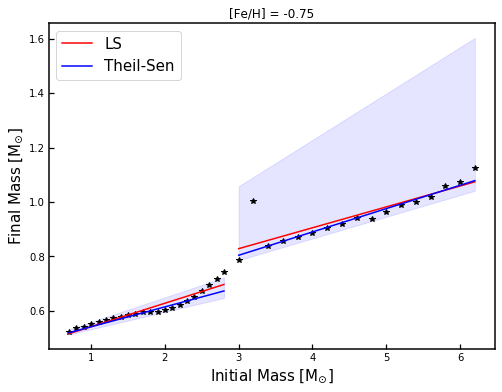

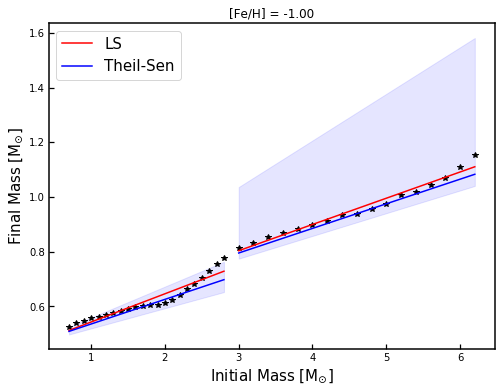

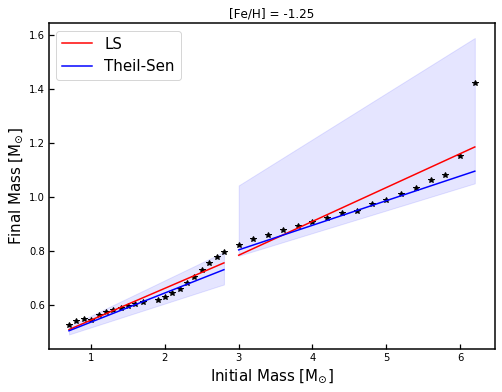

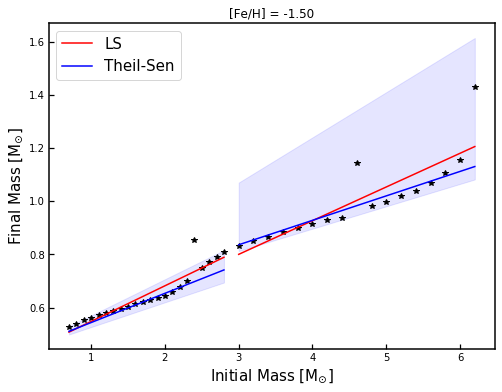

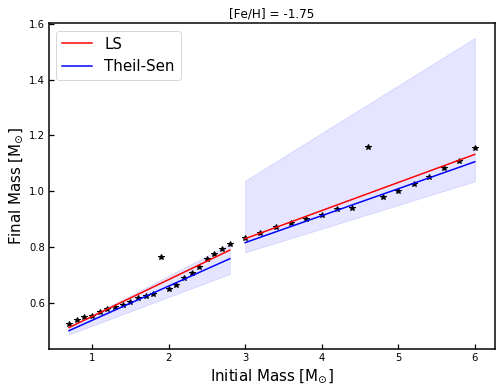

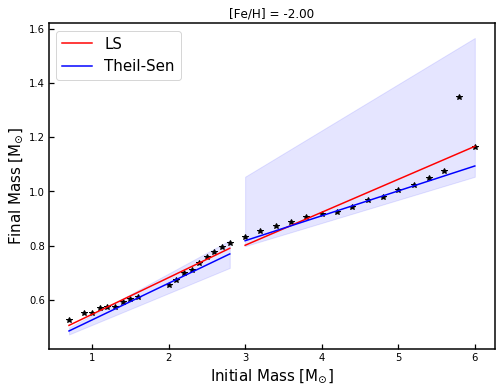

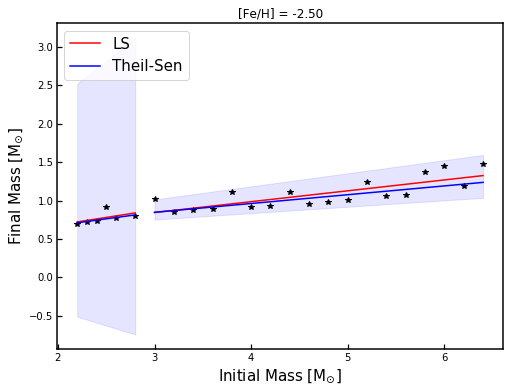

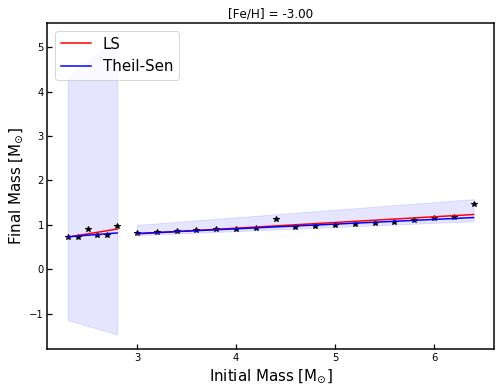

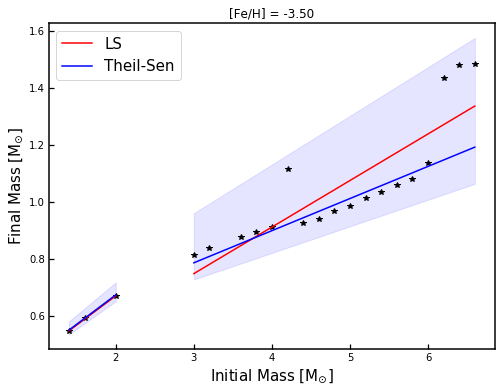

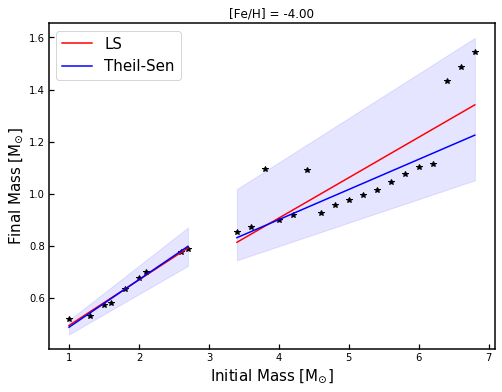

In [12]:
# Least squares - Theil-Sen comparison

for mi_out, mf_out, index in zip(all_mis, all_mfs, range(len(all_mis))):
    x = mi_out
    y = mf_out
    
    low = np.where(x < 2.85)[0]
    hih = np.where(x >= 2.85)[0]
    
    plt.figure(figsize = (8,6))
    plt.title(str(mets[index]))
    
    # Low mass LS fit
    al, bl = np.polyfit(x[low], y[low], 1)
    fl = al*x[low] + bl
    
    # High mass LS fit
    ah, bh = np.polyfit(x[hih], y[hih], 1)
    fh = ah*x[hih] + bh
    
    plt.plot(x[low], y[low], 'k*', x[hih], y[hih], 'k*', label = '')
    
    plt.plot(x[low], fl, 'r-',label = ''),
    plt.plot(x[hih], fh, 'r-', label = 'LS')
    
    # Low mass Theil-Sen fit
    al, bl, lo_al, high_al = mstats.theilslopes(y[low], x[low], alpha=0.95)
    fl = al*x[low] + bl
    
    fl_lo = lo_al*x[low] + bl
    fl_hi = high_al*x[low] + bl  
    
    # High mass Theil-Sen fit
    ah, bh, lo_ah, high_bh = mstats.theilslopes(y[hih], x[hih], alpha=0.95)
    fh = ah*x[hih] + bh
    
    fh_lo = lo_ah*x[hih] + bh
    fh_hi = high_ah*x[hih] + bh
    
    plt.plot(x[low], fl, 'b-', label = '')
    plt.plot(x[hih], fh, 'b-', label = 'Theil-Sen')
    plt.fill_between(x[low], fl_lo, fl_hi, color = 'b', alpha = 0.1, label = '')
    plt.fill_between(x[hih], fh_lo, fh_hi, color = 'b', alpha = 0.1, label = '')
    
    plt.xlabel(r"Initial Mass [$M_{\odot}$]")
    plt.ylabel(r"Final Mass [$M_{\odot}$]")
    
    plt.legend(loc = 'upper left', fontsize = 15)
    
    plt.show()

[Fe/H] = +0.50


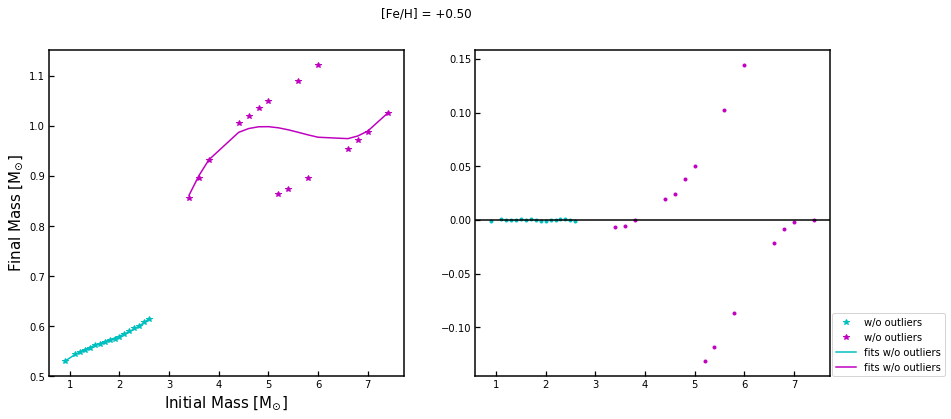

[Fe/H] = +0.25


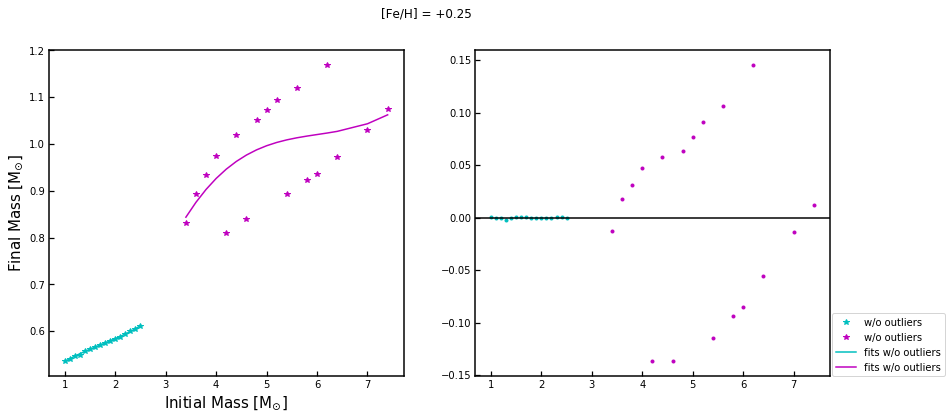

[Fe/H] = 0.00


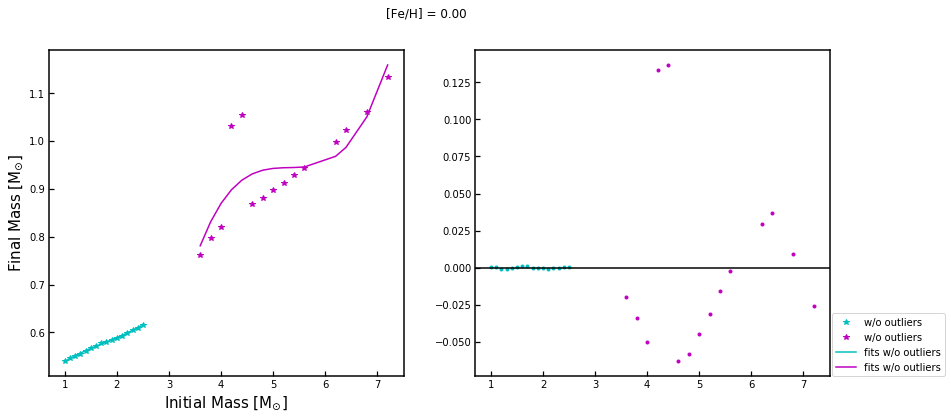

[Fe/H] = -0.25


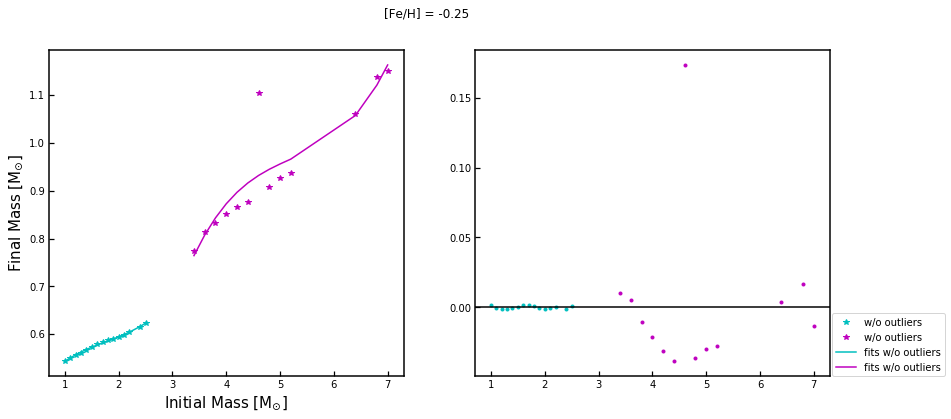

[Fe/H] = -0.50


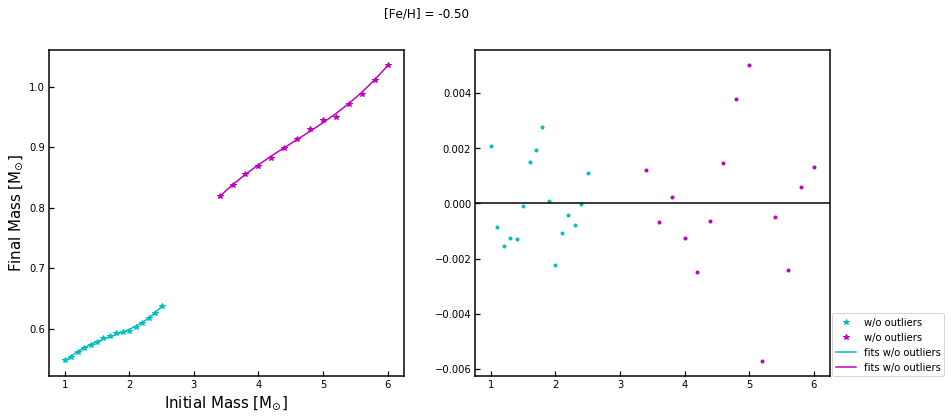

[Fe/H] = -0.75


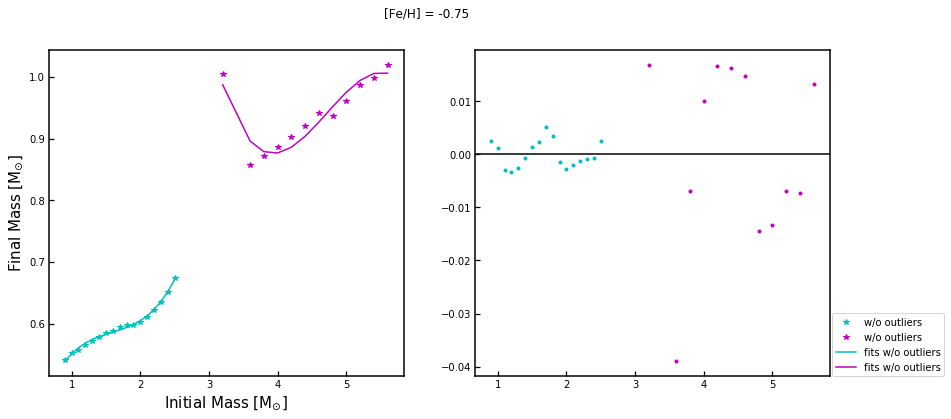

[Fe/H] = -1.00


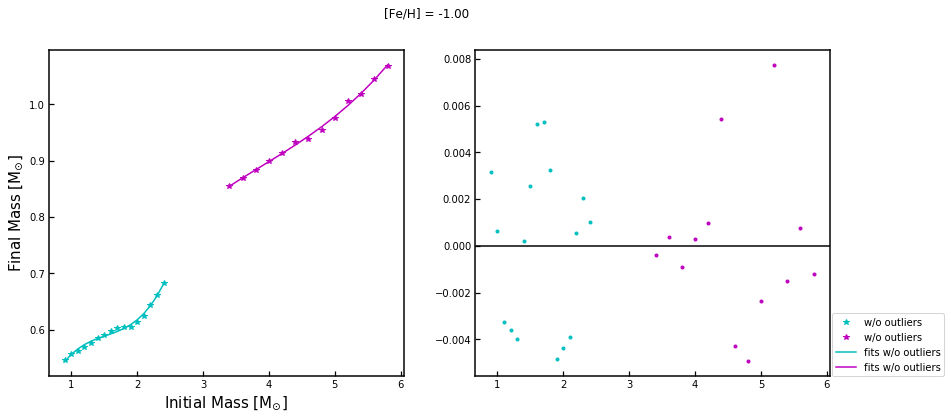

[Fe/H] = -1.25


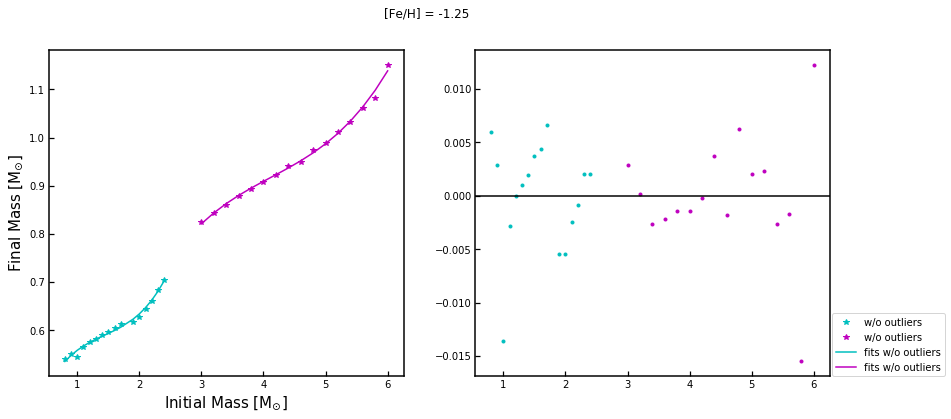

[Fe/H] = -1.50


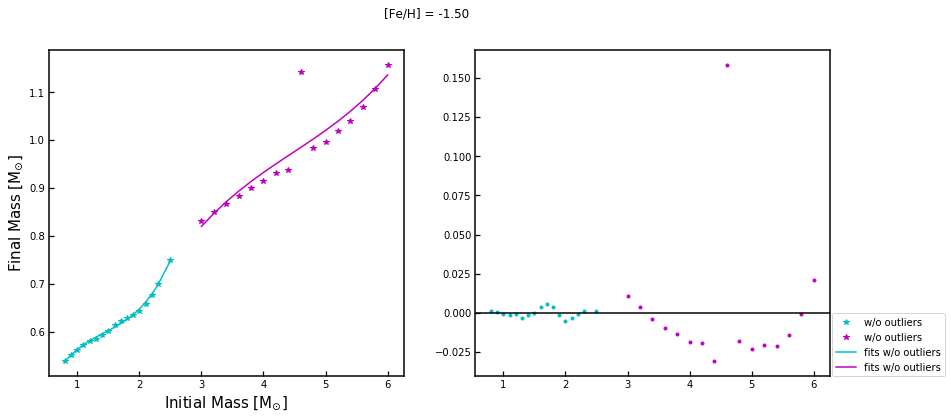

[Fe/H] = -1.75


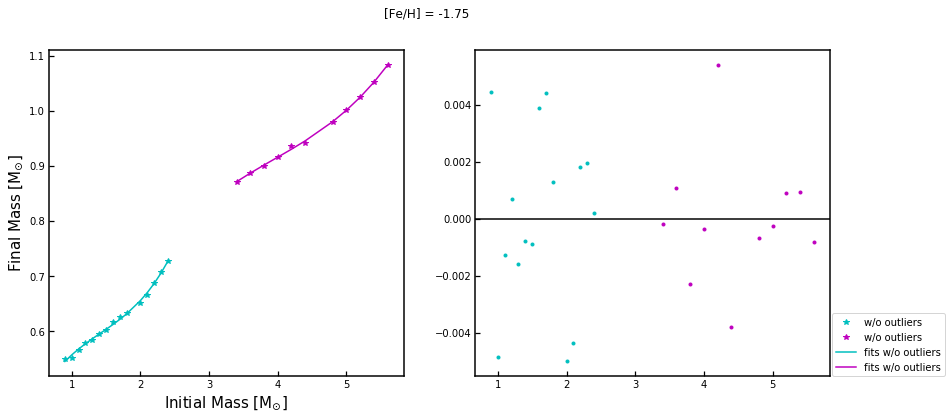

[Fe/H] = -2.00


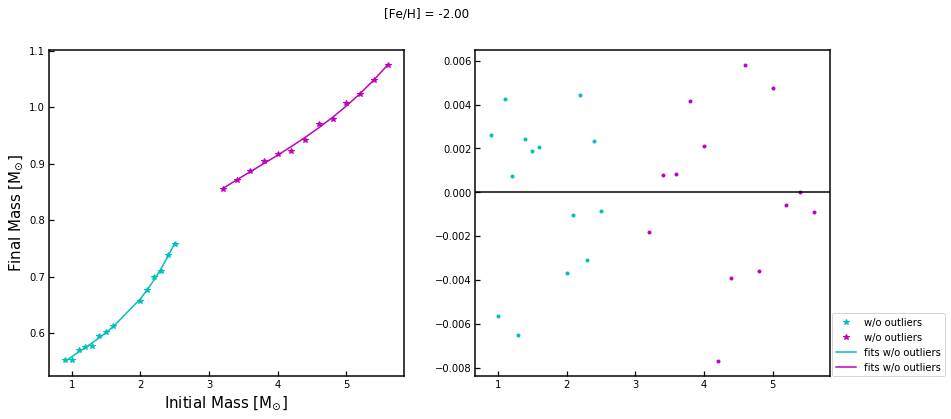

[Fe/H] = -2.50


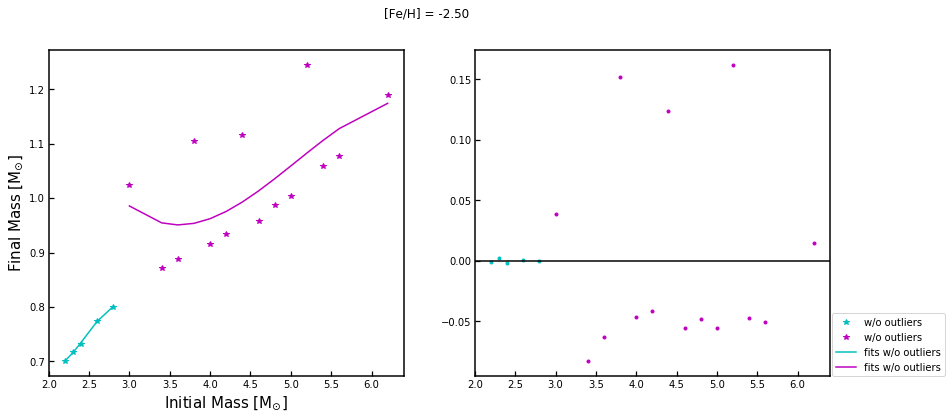

[Fe/H] = -3.00


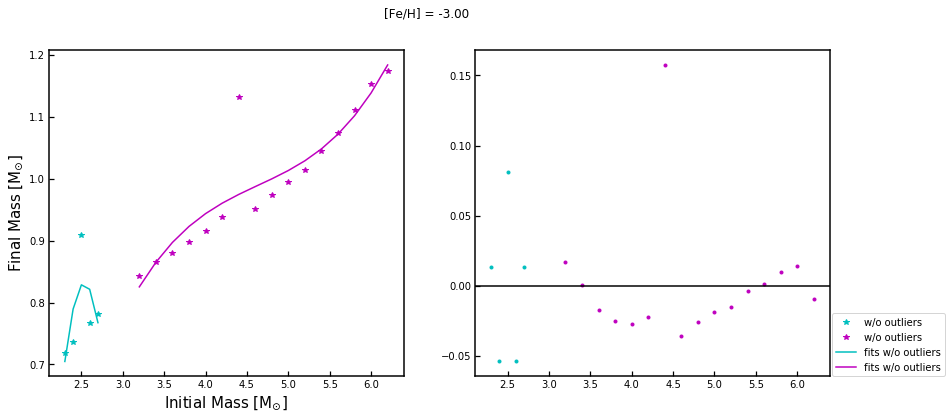

[Fe/H] = -3.50


/Users/MCilento/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RankWarning: Polyfit may be poorly conditioned
  if sys.path[0] == '':
/Users/MCilento/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RankWarning: Polyfit may be poorly conditioned


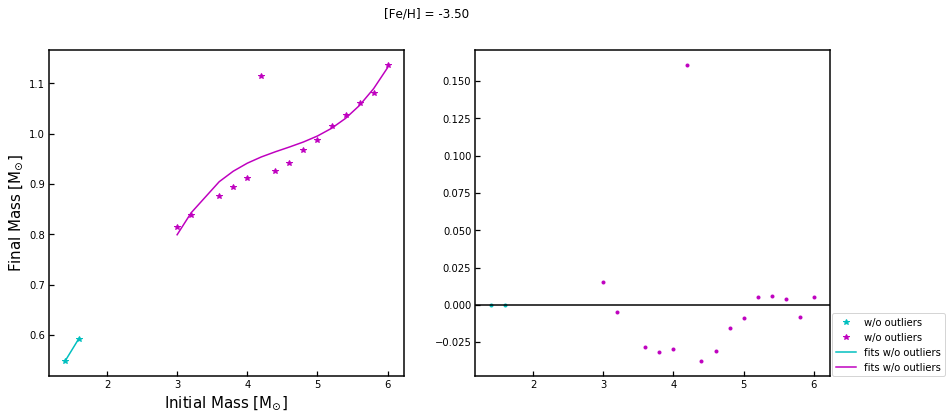

[Fe/H] = -4.00


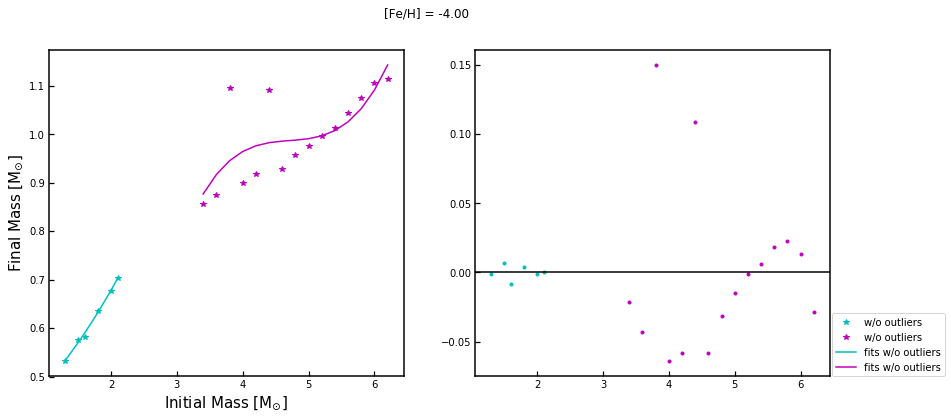

In [13]:
# Cubic fit to data with z-score < 1.2
# Residuals are also plotted to show accuracy of fit

for mi_out, mf_out, index in zip(all_mis, all_mfs, range(len(all_mis))):
    print(mets[index])
    x = mi_out
    y = mf_out
    
    low = np.where(x < 2.85)[0]
    hih = np.where(x >= 2.85)[0]
    
    al, bl, cl, dl = np.polyfit(x[low], y[low], 3)
    fl = al*x[low]**3 + bl*x[low]**2 + cl*x[low] + dl
    
    ah, bh, ch, dh = np.polyfit(x[hih], y[hih], 3)
    fh = ah*x[hih]**3 + bh*x[hih]**2 + ch*x[hih] + dh
    
    zl = np.abs(stats.zscore(y[low]))
    zh = np.abs(stats.zscore(y[hih]))
    maskl = np.where(zl <= 1.2)
    maskh = np.where(zh <= 1.2)
    
    alc, blc, clc, dlc = np.polyfit(x[low][maskl], y[low][maskl], 3)
    flc = alc*x[low][maskl]**3 + blc*x[low][maskl]**2 + clc*x[low][maskl] + dlc
    
    ahc, bhc, chc, dhc = np.polyfit(x[hih][maskh], y[hih][maskh], 3)
    fhc = ahc*x[hih][maskh]**3 + bhc*x[hih][maskh]**2 + chc*x[hih][maskh] + dhc
    
    plt.figure(figsize = (14,6))
    plt.subplot(1,2,1)
    plt.suptitle(str(mets[index]))
    
    plt.plot(x[low][maskl], y[low][maskl], 'c*', x[hih][maskh], y[hih][maskh], 'm*', label = 'w/o outliers')
    plt.plot(x[low][maskl], flc, 'c-', x[hih][maskh], fhc, 'm-', label = 'fits w/o outliers')
    
    plt.xlabel(r"Initial Mass [$M_{\odot}$]")
    plt.ylabel(r"Final Mass [$M_{\odot}$]")
    leg = plt.legend(loc = (2.205, 0.))
    
    plt.subplot(1,2,2)
    plt.plot(x[low][maskl], y[low][maskl] - flc, 'c.', x[hih][maskh], y[hih][maskh] - fhc, 'm.', label = '')

    
    plt.axhline(0, color="k")
    
    plt.show()

<a id = 'datafitting'></a>

## Data Fitting with Theil-Sen Method
Fitting observational data to compare to fits of MIST

<font size = '2'>*<a href = '#top' style="text-decoration:none"> Return to top ↑ </a>*</font>

In [14]:
"""
Derive fits of Cummings observational data using Theil-Sen Method.

"""

i = np.argsort(obsMi)

# Set Low / High Initial Mass Boundaries
low = np.where(obsMi[i] < 2.85)
hih = np.where(obsMi[i] >= 2.85)

low_init_masses = obsMi[i][low]
low_fin_masses = obsMf[i][low]

high_init_masses = obsMi[i][hih]
high_fin_masses = obsMf[i][hih]


# Theil-Sen fit 
a, b, lo_a, high_a = mstats.theilslopes(low_fin_masses, low_init_masses, alpha=0.95)    # Low Masses
c, d, low_c, high_c = mstats.theilslopes(high_fin_masses, high_init_masses, alpha=0.95) # High Masses


# Equations of Best Fit
best_fit_low = a*low_init_masses + b   # Low Masses
best_fit_high = c*high_init_masses + d # High Masses

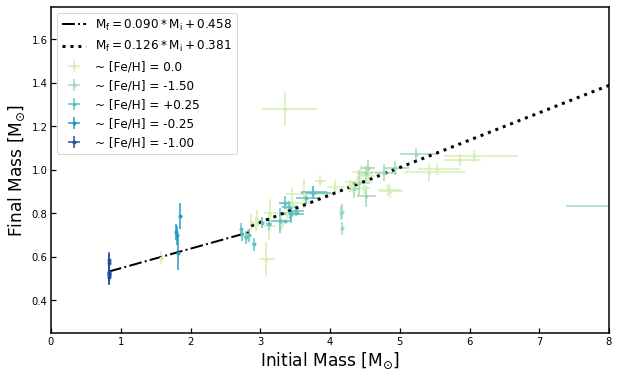

In [15]:
"""
Cummings et. al data plotted by metallicity with overall Theil-Sen fit.

"""

zeros = [wd_z000, wd_p001, wd_m011, wd_m004]
m150s = [wd_m0143]
p025s = [wd_p015]
m025s = [wd_m020]
m100s = [wd_m110]

cummings_mets = [zeros, m150s, p025s, m025s, m100s]
cummings_labels = ['~ [Fe/H] = 0.0', '~ [Fe/H] = -1.50', '~ [Fe/H] = +0.25', '~ [Fe/H] = -0.25', '~ [Fe/H] = -1.00']

plt.figure(figsize = (10, 6))

for i, index in zip(cummings_mets, range(len(cummings_mets))):    
    for indexj, j in enumerate(i):
        if indexj > 0:
            labels = ''
        else:
            labels = cummings_labels[index]
        color = cmap(1.*index/len(cummings_mets))
        obsMfs, obsMferrs = j['M_f'], j['M_ferr']
        obsMis, obsMi_tops, obsMi_bots = j['MIST_M_i'], j['mmi_low'], j['mmi_high']
        
        plt.errorbar(obsMis, obsMfs, yerr = obsMferrs, xerr = [obsMi_tops, obsMi_bots],
                     color = color, marker = '.', ls = 'None', label = labels)


plt.legend(loc = 'upper right')
plt.xlabel(r"Initial Mass [$M_{\odot}$]")
plt.ylabel(r"Final Mass [$M_{\odot}$]")   


# plot Theil-Sen Fit
plt.plot(low_init_masses, best_fit_low, 'k', linestyle = '-.', linewidth = 2, label=r'$M_f = {0:.3f}*M_i + {1:.3}$'.format(a, b))
plt.plot(high_init_masses, best_fit_high, 'k', linestyle = ':', linewidth = 3, label=r'$M_f = {0:.3f}*M_i + {1:.3}$'.format(c, d))

plt.legend(loc = 'upper left', fontsize = 12)
plt.ylabel(r"Final Mass [$M_{\odot}$]", fontsize = 17)
plt.xlabel(r"Initial Mass [$M_{\odot}$]", fontsize = 17)
plt.ylim(0.25, 1.75)
plt.xlim(0, 8)

#plt.savefig('Overall_data_fits.png')

plt.show()

/Users/MCilento/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


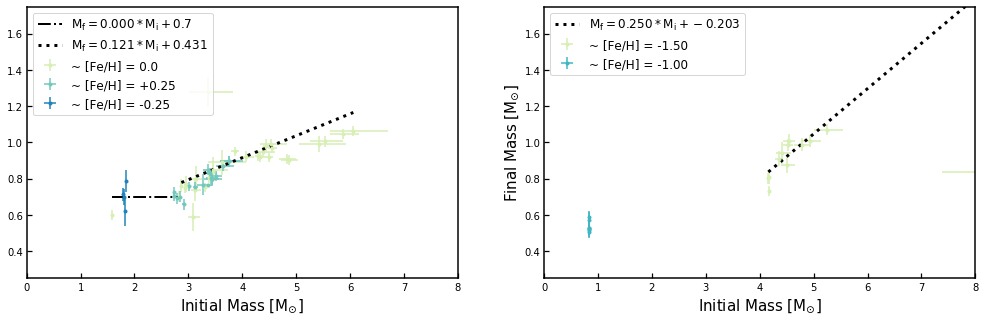

In [16]:
"""
Cummings et. al data in two panels for mid and high metallicity, each with Theil-Sen fits. The 
cutoff points for low, mid, and high metallicity were chosen to match the metallicities in these
categories for the MIST models, enabling direct comparison.

Low -   No Data Available
Mid -   m100s, m150s
High -  m025s, zeros, p025s

"""

zeros = [wd_z000, wd_p001, wd_m011, wd_m004]
m150s = [wd_m0143]
p025s = [wd_p015]
m025s = [wd_m020]
m100s = [wd_m110]

high_inits = np.array(list(wd_z000['MIST_M_i']) + list(wd_p015['MIST_M_i']) + list(wd_m020['MIST_M_i']) + list(wd_p001['MIST_M_i']) + list(wd_m011['MIST_M_i']) + list(wd_m004['MIST_M_i']))
high_fs = np.array(list(wd_z000['M_f']) + list(wd_p015['M_f']) + list(wd_m020['M_f']) + list(wd_p001['M_f']) + list(wd_m011['M_f']) + list(wd_m004['M_f']))

mid_inits = np.array(list(wd_m110['MIST_M_i']) + list(wd_m0143['MIST_M_i']))
mid_fs = np.array(list(wd_m110['M_f']) + list(wd_m0143['M_f']))


# Mid-Mets Theil-Sen Fits
i = np.argsort(mid_inits)

# Set Low / High Initial Mass Boundaries
low = np.where(mid_inits[i] < 2.85)
hih = np.where(mid_inits[i] >= 2.85)

low_init_masses = mid_inits[i][low]
low_fin_masses = mid_fs[i][low]

high_init_masses = mid_inits[i][hih]
high_fin_masses = mid_fs[i][hih]

# Theil-Sen fit 
c, d, low_c, high_c = mstats.theilslopes(high_fin_masses, high_init_masses, alpha=0.95) # High Masses

# Equations of Best Fit
best_fit_high = c*high_init_masses + d # High Masses



# High-Mets Theil-Sen Fits
k = np.argsort(high_inits)

# Set Low / High Initial Mass Boundaries
low_h = np.where(high_inits[k] < 2.85)
hih_h = np.where(high_inits[k] >= 2.85)

low_init_masses_h = high_inits[k][low_h]
low_fin_masses_h = high_fs[k][low_h]
              
high_init_masses_h = high_inits[k][hih_h]
high_fin_masses_h = high_fs[k][hih_h]

# Theil-Sen fit 
a_h, b_h, lo_a_h, high_a_h = mstats.theilslopes(low_fin_masses_h, low_init_masses_h, alpha=0.95)    # Low Masses
c_h, d_h, low_c_h, high_c_h = mstats.theilslopes(high_fin_masses_h, high_init_masses_h, alpha=0.95) # High Masses

# Equations of Best Fit
best_fit_low_h = a_h*low_init_masses_h + b_h   # Low Masses
best_fit_high_h = c_h*high_init_masses_h + d_h # High Masses



# Plot Data and Fits
cummings_mid_mets = [m150s, m100s]
cummings_high_mets = [zeros, p025s, m025s]

cummings_mid_labels = ['~ [Fe/H] = -1.50', '~ [Fe/H] = -1.00']
cummings_high_labels = ['~ [Fe/H] = 0.0', '~ [Fe/H] = +0.25', '~ [Fe/H] = -0.25']

plt.figure(figsize = (17, 5))

# Mid-Metallicity Plot
for i, index in zip(cummings_mid_mets, range(len(cummings_mid_mets))): 
    ax1 = plt.subplot(1, 2, 2)
    ax1.set_ylabel(r"Final Mass [$M_{\odot}$]")
    ax1.set_xlabel(r"Initial Mass [$M_{\odot}$]")
    
    for indexj, j in enumerate(i):
        if indexj > 0:
            labels_mid = ''
        else:
            labels_mid = cummings_mid_labels[index]
        color = cmap(1.*index/len(cummings_mid_mets))
        obsMfs, obsMferrs = j['M_f'], j['M_ferr']
        obsMis, obsMi_tops, obsMi_bots = j['MIST_M_i'], j['mmi_low'], j['mmi_high']

        ax1.errorbar(obsMis, obsMfs, yerr = obsMferrs, xerr = [obsMi_tops, obsMi_bots],
                     color = color, marker = '.', ls = 'None', label = labels_mid)

ax1.plot(high_init_masses, best_fit_high, 'k', linestyle = ':', linewidth = 3, label=r'$M_f = {0:.3f}*M_i + {1:.3}$'.format(c, d))

plt.legend(loc = 'upper left', fontsize=12)
plt.ylim(0.25, 1.75)
plt.xlim(0, 8)

# High-Metallicity Plot
for i, index in zip(cummings_high_mets, range(len(cummings_high_mets))):
    ax2 = plt.subplot(1, 2, 1)
    ax2.set_xlabel(r"Initial Mass [$M_{\odot}$]")
    for indexj, j in enumerate(i):
        if indexj > 0:
            labels_high = ''
        else:
            labels_high = cummings_high_labels[index]
        color = cmap(1.*index/len(cummings_high_mets))
        obsMfs, obsMferrs = j['M_f'], j['M_ferr']
        obsMis, obsMi_tops, obsMi_bots = j['MIST_M_i'], j['mmi_low'], j['mmi_high']
        
        ax2.errorbar(obsMis, obsMfs, yerr = obsMferrs, xerr = [obsMi_tops, obsMi_bots],
                     color = color, marker = '.', ls = 'None', label = labels_high)

ax2.plot(low_init_masses_h, best_fit_low_h, 'k', linestyle = '-.', linewidth = 2, label=r'$M_f = {0:.3f}*M_i + {1:.3}$'.format(a_h, b_h))
ax2.plot(high_init_masses_h, best_fit_high_h, 'k', linestyle = ':', linewidth = 3, label=r'$M_f = {0:.3f}*M_i + {1:.3}$'.format(c_h, d_h))

plt.legend(loc = 'upper left', fontsize=12)

plt.ylim(0.25, 1.75)
plt.xlim(0, 8)

#plt.savefig('Data_Fits_Panel.png')

plt.show()